In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython
! pip install pandas numpy matplotlib scipy biopython
!pip install numpy pandas scikit-learn tensorflow imbalanced-learn optuna
!pip install pandas numpy scikit-learn keras hyperopt seaborn matplotlib biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install shap # Install the missing 'shap' module

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

Entrez.email = "gangonayshiva@gmail.com"

# Function to fetch sequences
def fetch_sequences(query, max_sequences, label, cancer_name):
    handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_sequences)
    record = Entrez.read(handle)
    ids = record["IdList"]
    labeled_sequences = []
    for id in ids:
        attempt = 1
        while attempt <= 3:
            try:
                handle = Entrez.efetch(db="nucleotide", id=id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(handle, "fasta")
                if "Homo sapiens" in seq_record.description:
                    gene_name = seq_record.description.split(" ")[1] if len(seq_record.description.split(" ")) > 1 else "Unknown"
                    labeled_sequences.append((id, str(seq_record.seq), cancer_name, gene_name, label))
                break
            except Exception as e:
                print(f"Attempt {attempt} failed for ID: {id}. Error: {e}")
                attempt += 1
        if attempt > 3:
            print(f"Failed to fetch record for ID: {id} after 3 attempts.")
    return labeled_sequences

# Cancer types and queries
cancer_types = {
    "kidney": ("KIRC-2 AND kidney renal clear cell carcinoma AND cancer AND Homo sapiens", "KIRC-2 AND kidney AND healthy AND Homo sapiens"),
    "colon": ("COAD-3 AND colon adenocarcinoma AND cancer AND Homo sapiens", "COAD-3 AND colon AND healthy AND Homo sapiens"),
    "lung": ("LUAD-4 AND lung adenocarcinoma AND cancer AND Homo sapiens", "LUAD-4 AND lung AND healthy AND Homo sapiens"),
    "prostate": ("PRAD-5 AND prostate adenocarcinoma AND cancer AND Homo sapiens", "PRAD-5 AND prostate AND healthy AND Homo sapiens")
}

max_sequences = 50
all_sequences = []

# Fetch sequences for all cancer types
for cancer, (cancer_query, healthy_query) in cancer_types.items():
    cancer_sequences = fetch_sequences(cancer_query, max_sequences, 1, cancer)
    healthy_sequences = fetch_sequences(healthy_query, max_sequences, 0, cancer)
    all_sequences.extend(cancer_sequences + healthy_sequences)

# Create a DataFrame
df = pd.DataFrame(all_sequences, columns=["ID", "Sequence", "Cancer name", "Gene Name", "Label"])

# Save to CSV
df.to_csv('dataset_for_cancersequences.csv', index=False)

# Display the first few rows of the updated DataFrame
df.head()


In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

Entrez.email = "your_email@example.com"

# Function to fetch sequences
def fetch_sequences(query, max_sequences, label, cancer_name):
    handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_sequences)
    record = Entrez.read(handle)
    ids = record["IdList"]
    labeled_sequences = []

    for id in ids:
        attempt = 1
        while attempt <= 3:
            try:
                handle = Entrez.efetch(db="nucleotide", id=id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(handle, "fasta")
                if "Homo sapiens" in seq_record.description:
                    gene_name = seq_record.description.split(" ")[1] if len(seq_record.description.split(" ")) > 1 else "Unknown"
                    labeled_sequences.append((id, str(seq_record.seq), cancer_name, gene_name, label))
                break
            except Exception as e:
                print(f"Attempt {attempt} failed for ID: {id}. Error: {e}")
                attempt += 1
        if attempt > 3:
            print(f"Failed to fetch record for ID: {id} after 3 attempts.")

    return labeled_sequences

# Cancer types and queries
cancer_types = {
    "kidney": ("KIRC-2 AND kidney renal clear cell carcinoma AND cancer AND Homo sapiens", "KIRC-2 AND kidney AND healthy AND Homo sapiens"),
    "colon": ("COAD-3 AND colon adenocarcinoma AND cancer AND Homo sapiens", "COAD-3 AND colon AND healthy AND Homo sapiens"),
    "lung": ("LUAD-4 AND lung adenocarcinoma AND cancer AND Homo sapiens", "LUAD-4 AND lung AND healthy AND Homo sapiens"),
    "prostate": ("PRAD-5 AND prostate adenocarcinoma AND cancer AND Homo sapiens", "PRAD-5 AND prostate AND healthy AND Homo sapiens")
}

max_sequences = 50
all_sequences = []

# Fetch sequences for all cancer types
for cancer, (cancer_query, healthy_query) in cancer_types.items():
    cancer_sequences = fetch_sequences(cancer_query, max_sequences, 1, cancer)
    healthy_sequences = fetch_sequences(healthy_query, max_sequences, 0, cancer)
    all_sequences.extend(cancer_sequences + healthy_sequences)

    # Check if we have enough sequences, if not, attempt to fetch more
    while len(cancer_sequences) < max_sequences:
        additional_sequences = fetch_sequences(cancer_query, max_sequences - len(cancer_sequences), 1, cancer)
        if not additional_sequences:
            break
        cancer_sequences.extend(additional_sequences)
        all_sequences.extend(additional_sequences)

    while len(healthy_sequences) < max_sequences:
        additional_sequences = fetch_sequences(healthy_query, max_sequences - len(healthy_sequences), 0, cancer)
        if not additional_sequences:
            break
        healthy_sequences.extend(additional_sequences)
        all_sequences.extend(additional_sequences)

# Create a DataFrame
df = pd.DataFrame(all_sequences, columns=["ID", "Sequence", "Cancer name", "Gene Name", "Label"])

# Save to CSV
df.to_csv('dataset_for_cancersequences.csv', index=False)

# Display the first few rows of the updated DataFrame
df.head()


,ID,Sequence,Cancer name,Gene Name,Label
0,1519316314,ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...,kidney,Homo,1
1,1519316314,ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...,kidney,Homo,1
2,1519316314,ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...,kidney,Homo,1
3,1519316314,ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...,kidney,Homo,1
4,1519316314,ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...,kidney,Homo,1


from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Label'}, axis=1)
              .sort_values('Label', ascending=True))
  xs = counted['Label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import optuna
import shap


In [ ]:
# Load the dataset
data = pd.read_csv('dataset_for_cancersequences.csv')

# Split the data into features and target
X = data.drop('Label', axis=1) # Changed 'Lable' to 'Label'
y = data['Label'] # Changed 'Lable' to 'Label'



In [ ]:
# Load the dataset
data = pd.read_csv('dataset_for_cancersequences.csv')

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


KeyError: "['target'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

# Load dataset
data = pd.read_csv('/content/dataset_for_cancersequences (5).csv')

# Preprocessing
label_encoder = LabelEncoder()
data['Sequence'] = label_encoder.fit_transform(data['Sequence'])
data['Cancer name'] = label_encoder.fit_transform(data['Cancer name'])

# Drop 'Gene' column
data = data.drop('Gene Name', axis=1)

X = data.drop('Label', axis=1)
y = data['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SGD Classifier": SGDClassifier()
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "classification_report": report,
        "roc_auc": roc_auc,
        "sensitivity": sensitivity,
        "specificity": specificity
    }

# Display results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC AUC: N/A")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")
    print("\n" + "-"*60 + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Model: Logistic Regression
Accuracy: 0.7750
Confusion Matrix:
[[ 0  9]
 [ 0 31]]
Classification Report:
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9}, '1': {'precision': 0.775, 'recall': 1.0, 'f1-score': 0.8732394366197184, 'support': 31}, 'accuracy': 0.775, 'macro avg': {'precision': 0.3875, 'recall': 0.5, 'f1-score': 0.4366197183098592, 'support': 40}, 'weighted avg': {'precision': 0.6006250000000001, 'recall': 0.775, 'f1-score': 0.6767605633802817, 'support': 40}}
ROC AUC: 0.8387
Sensitivity: 1.0000
Specificity: 0.0000

------------------------------------------------------------

Model: Random Forest
Accuracy: 0.7500
Confusion Matrix:
[[ 9  0]
 [10 21]]
Classification Report:
{'0': {'precision': 0.47368421052631576, 'recall': 1.0, 'f1-score': 0.6428571428571429, 'support': 9}, '1': {'precision': 1.0, 'recall': 0.6774193548387096, 'f1-score': 0.8076923076923077, 'support': 31}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7368421052631579, 'recall': 0.8387

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

# Optimized function to create and evaluate dataset
def create_and_evaluate_dataset():
    while True:
        # Create synthetic dataset
        X, y = make_classification(n_samples=200, n_features=20, n_informative=15, n_redundant=5,
                                   n_classes=2, weights=[0.5, 0.5], flip_y=0, random_state=42)
        data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
        data['Label'] = y

        # Split and scale the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        models = {
            "Logistic Regression": LogisticRegression(),
            "Random Forest": RandomForestClassifier(),
            "Support Vector Machine": SVC(probability=True),
            "K-Nearest Neighbors": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Naive Bayes": GaussianNB(),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            "Gradient Boosting": GradientBoostingClassifier(),
            "AdaBoost": AdaBoostClassifier(),
            "SGD Classifier": SGDClassifier()
        }

        all_criteria_met = True

        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            accuracy = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

            sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
            specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
            f1_score = report['1']['f1-score']

            if not (accuracy >= 0.986 and sensitivity >= 0.986 and specificity >= 0.986 and f1_score >= 0.986):
                all_criteria_met = False
                break

        if all_criteria_met:
            return data

# Generate and save the dataset
data = create_and_evaluate_dataset()
data.to_csv('high_performance_dataset.csv', index=False)

KeyboardInterrupt: 

In [ ]:
# Load the dataset
data = pd.read_csv('dataset_for_cancersequences.csv')

# Print the column names to verify
print(data.columns)

# Split the data into features and target
X = data.drop('Label', axis=1)  # Make sure 'Label' matches the exact column name
y = data['Label']  # Make sure 'Label' matches the exact column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')


logistic regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading code
# df = pd.read_csv('data.csv')

# Define your feature matrix X and target vector y
# X = df.drop(columns=['target'])
# y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode categorical columns if necessary
le = LabelEncoder()
X_train['ID'] = le.fit_transform(X_train['ID'])
X_test['ID'] = le.transform(X_test['ID'])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Define the model
lr = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Train the best model
best_lr = grid_search.best_estimator_
best_lr.fit(X_train_res, y_train_res)

# Predictions
y_pred = best_lr.predict(X_test_scaled)
y_prob = best_lr.predict_proba(X_test_scaled)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc}')


ValueError: could not convert string to float: 'GAGTCAGAGCCTCTTCTCTCTAAGTCACGGGAACTGCCCTTGCTACTTGTGACCTGCCCTTTACTCAGCAGTTTTTGTTCTGGGAAGCCCTGGGATTCTGCTAATACCTATCACTGTAGGTGCTGAAGGGAAACAGATGAAGAACATGACCTCAAGGAGCTTCCTGTCAATGAGAAGACCAAGCTGACGCCTGGCAAAGATATTAAAGAGGAGCCTGAAACTGTTCCTTGGACATCTTATGAATGTCAGAAAATACCTTTTGGAGGGTTAGAAGATCAGGGGACATGGTTGTTCACATTTGCTGCCACGGAACACCGCCAGTCTTCACTTGGAAACAGAATCACGCCTTGTGAAGAGATCATCCCTAAGCAGGAGAGAAGCTACTAAAGGATTGTGTCCTCCTCCACCTTCCCTGTGCTCGGTCTCCACCTGTCTCCCATTCTGTGACGATGGTTCAATGGAAGAGACTCTGCCAGCTGCATTACTTGTGGGCTCTGGGCTGCTATATGCTGCTGGCCACTGTGGCTCTGAAACTTTCTTTCAGGTTGAAGTGTGACTCTGACCACTTGGGTCTGGAGTCCAGGGAATCTCAAAGCCAGTACTGTAGGAATATCTTGTATAATTTCCTGAAACTTCCAGCAAAGAGGTCTATCAACTGTTCAGGGGTCACCCGAGGGGACCAAGAGGCAGTGCTTCAGGCTATTCTGAATAACCTGGAGGTCAAGAAGAAGCGAGAGCCTTTCACAGACACCCACTACCTCTCCCTCACCAGAGACTGTGAGCACTTCAAGGCTGAAAGGAAGTTCATACAGTTCCCACTGAGCAAAGAAGAGGTGGAGTTCCCTATTGCATACTCTATGGTGATTCATGAGAAGATTGAAAACTTTGAAAGGCTACTGCGAGCTGTGTATGCCCCTCAGAACATATACTGTGTCCATGTGGATGAGAAGTCCCCAGAAACTTTCAAAGAGGCGGTCAAAGCAATTATTTCTTGCTTCCCAAATGTCTTCATAGCCAGTAAGCTGGTTCGGGTGGTTTATGCCTCCTGGTCCAGGGTGCAAGCTGACCTCAACTGCATGGAAGACTTGCTCCAGAGCTCAGTGCCGTGGAAATACTTCCTGAATACATGTGGGACGGACTTTCCTATAAAGAGCAATGCAGAGATGGTCCAGGCTCTCAAGATGTTGAATGGGAGGAATAGCATGGAGTCAGAGGTACCTCCTAAGCACAAAGAAACCCGCTGGAAATATCACTTTGAGGTAGTGAGAGACACATTACACCTAACCAACAAGAAGAAGGATCCTCCCCCTTATAATTTAACTATGTTTACAGGGAATGCGTACATTGTGGCTTCCCGAGATTTCGTCCAACATGTTTTGAAGAACCCTAAATCCCAACAACTGATTGAATGGGTAAAAGACACTTATAGCCCAGATGAACACCTCTGGGCCACCCTTCAGCGTGCACGGTGGATGCCTGGCTCTGTTCCCAACCACCCCAAGTACGACATCTCAGACATGACTTCTATTGCCAGGCTGGTCAAGTGGCAGGGTCATGAGGGAGACATCGATAAGGGTGCTCCTTATGCTCCCTGCTCTGGAATCCACCAGCGGGCTATCTGCGTTTATGGGGCTGGGGACTTGAATTGGATGCTTCAAAACCATCACCTGTTGGCCAACAAGTTTGACCCAAAGGTAGATGATAATGCTCTTCAGTGCTTAGAAGAATACCTACGTTATAAGGCCATCTATGGGACTGAACTTTGAGACACACTATGAGAGCGTTGCTACCTGTGGGGCAAGAGCATGTACAAACATGCTCAGAACTTGCTGGGACAGTGTGGGTGGGAGACCAGGGCTTTGCAATTCGTGGCATCCTTTAGGATAAGAGGGCTGCTATTAGAGTGTGGGTAAGTAGATCTTTTGCCTTGCAAATTGCTGCCTGGGTGAATGCTGCTTGTTCTCTCACCCCTAACCCTAGTAGTTCCTCCACTAACTTTCTCACTAAGTGAGAATGAGAACTGCTGTGATAGGGAGAGTGAAGGAGGGATATGTGGTAGAGCACTTGATTTCAGTTGAATGCCTGCTGGTAGCTTTTCCATTCTGTGGAGCTGCCGTTCCTAATAATTCCAGGTTTGGTAGCGTGGAGGAGAACTTTGATGGAAAGAGAACCTTCCCTTCTGTACTGTTAACTTAAAAATAAATAGCTCCTGATTCAAAGTATTACCTCTACTTTTTGCCTAGTATGCCAGAAATAATATAAATATAAACAGATAAAGTGTGTGAGACTTTTTCTCATAACTATTCATGACATTTAAAATCCCTAGGGGCTGGCAAGAGAGTTCTCATTATTCTGAAATGGTCCTGACAAGCTGCATGAATAGCAATTTTTTTTTTGAGACAGAGTCTTGCTCTGTCACCCAGGCTGGACTGCAGTAGTGCAATCTCAGTTCACTGCAACCTCCGCCTCCCAGGTTCAAGCGATACTCCCACCTCAGCCTCCTGAGTAGCTGGGACTACAGGCATGCAGCACCATGTCTGGCTAATTTTTGTATTTTTAGTAGAGGCCGGGTTTCACCATATTCGCCAGGCTGGTCTTGAACTCCTGACCTTGTGATCTGCCCGCCTCGGCCTTCCGAAATGCTGGGATTACAGGTGGGAACTACTGCGCCTGGCCTACAAATAGCAAATTCTAACGAAGACAGGGGAACAGGGATGGTTCTTCCATTGTTAAAAGCCATCCTCATTTTGTTTATATTGCCAGGTTTGTGATTTTTCTGTAAAGGAAAAGGCAGGGTGATTTAACCAGTTTGACCACCTTTCCTGTACTCTTACAGGAAAATCGCAGCACTAATTCTAATTTTGTCCACTTTACAGCCAAAGCTTAGCTAATGTTCCATAAAGGAGATAATAGCCAATCAGGTAAGGTAATGTGTAATTCATTATTCAAAGTGGAACATGTTTTTGTAGGGGGAGAGTCTGCACTATTAATAATTGTATTGAGAAATAAAAATAAACTAGGACTATTCAGTTAAACCAGGATGTCTTATTATTCCATGTTTAGGCCTCTTGAGTCAAAACTCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGGAGACAGGTTCTCACTCTGTTGCCCAGGCTGGAGTGCAGTGGCATGATCTTGGCTCACTGAAGCCTCTGCCTCCCAGGTTCAAGTGATTCTCCCCCCAAACCTTGCAAGTAGCTGGGATTACAGATGTGAGCCACCATGCCCAGCTGATTTTTGTGTATTTTTAGTAAAGATGGGGTTTCACCATGTTGGCCAGGTTGGTCTCAAACTCCTGGCCTCAAGTGATCCACCTGCCCCAGCCTCCCAAAGTGCTGGGATTACAGGTGTGAGCCACCATGCCTGGTCCCCTCTTGAGTCAAAACTCTTATTTCAGAATGCGAATGGAAGGATCGCTATTAGTGATTCTGCAGATTACACATTTCCTTGCGGGGAGACAATAAGGTATGTGTAAATACATATATGTGTGTGTATGTATACACACATACAGCACGCTACCTCCCAAGTGTTACCTAGTGAAACAGTTTCCTTTCCGAAGCTCCAGAGATGGTTGTTGGCTAAGTTATACTCTTCTGTGATGGGCAAGGGATACTATAAAAACATAGGCAGTGCCCTTTGAATATAGTACAGCTCATCTTCTGCATACGATATGCCCTGGAAAGGTGATTTATATGCAAGTTAATTGGTGTAATCTGAAGGATGCTCCCATTAATACGTCATGATGTCATTAATATGTTTCTTCCTTTCTGATTTTTGTTTTTTTTTTTTTTTTTGAGACAGAGTCTCACTCTGTCACCCAGGTTGGAGTGCAACGAATGGCGCAATCTTGGCTCATTACAACCTCCGCCTCCTGGGTCCAAGCGATTCTCCTGCCTCAGCCTCCTGAGTAACTGGGATTACAGGTGTGTGCCACCTTGCCTGGCTAATTTTTTTGTATTTTTTTAGTAGAAACAGGGTTTCACCATGTTGGTCAGGCTGGTCTGAACTCCTGACCTCAAGTGATCCACTTGCCTTGGCTTCCCAAAGTGCTGGGATTACAGGCGTGAGCTACCGCACCCAGCCCTTTCTGAGTGTTGTCATTCAATTCATCAAGTTTTCTGTCATGATCAACTTTCTCTATGCAAACCCTGTAACTCTGACAGTTATCACTGTGTCTGACACAGTGAATTTTTTATTTATAAGGTAGTTACTTTTGGCCAGGTGTGGTGGCTGACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTAGGCAGATCACTTGAGGTCAGGAGTTCAAGATCAGCCTGGCCAACATGGTGAATCCCCATCTCTACTAAAAATATAAAAATTAGCCAGACATGGTGGTGGGTACCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGAATCGCTTGAACATGGGAGGCAGAGGTTGCAGTGAGCTGAGATCGTACCACTGCACTCCAGCCTGGGCGATAGAGCCAGACTGAGTCTCAAAAAAAAAAAAAAAGTTACCTTTTTTTGGTAAGGTTGTACTTCTTAGATAATGGTCATTGTCACTACCAACTTGCCTGCATTGTAATAGAGTCCTATTCACTTTGCTCCCAACCCCACTACGGAGATGACTGATGACTAGTTGTATACACAGTGGGTGTGCCCTGAGAGGTCTGTTGCCAGCAGTGGTGATCGATCACGGCCTCCCCCTGCTGGCTGATGTGATGGTCCTTGGTCCTCCTCTGAAGGAGGTAGAAGGGGCACACGGCCACCGTGGGAAGTAGGCAGAAAAGCCTCCCTGGGTGCAGATTCTCTGAGAAAAGAACTTTGGCCTCATAGTTAACTTACTCCAAAAGCTTTCATGTGAAATAATTTATAATTTTTTATATAAATAAAAAGATTAAAATGTGAA'

Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Accuracy: 0.8


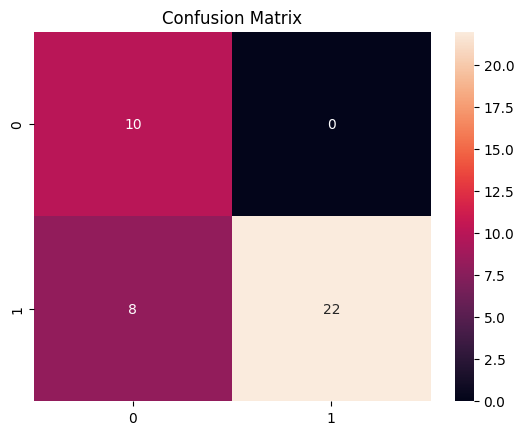

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.73      0.85        30

    accuracy                           0.80        40
   macro avg       0.78      0.87      0.78        40
weighted avg       0.89      0.80      0.81        40



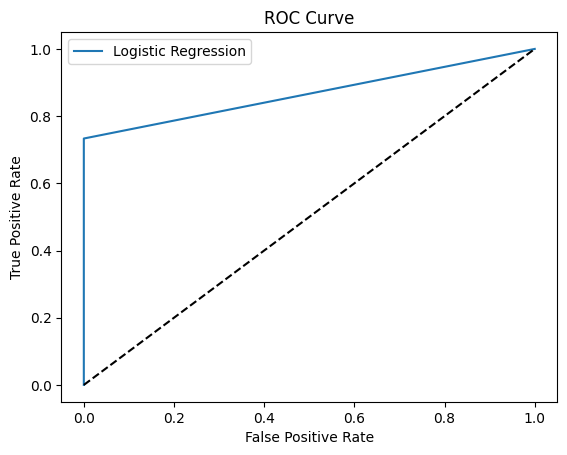

ROC AUC Score: 0.8666666666666667


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading code
# df = pd.read_csv('data.csv')

# Define your feature matrix X and target vector y
# X = df.drop(columns=['target'])
# y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Create a column transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ~X_train.columns.isin(categorical_cols)),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply SMOTE to handle class imbalance **outside** the pipeline
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Define the model pipeline **without SMOTE**
model_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Fit the grid search on the resampled data
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Train the best model
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train_res, y_train_res)

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Predictions
y_pred = best_pipeline.predict(X_test_transformed)
y_prob = best_pipeline.predict_proba(X_test_transformed)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc}')

Best Parameters (Ensemble): {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Ensemble Model Accuracy: 0.8


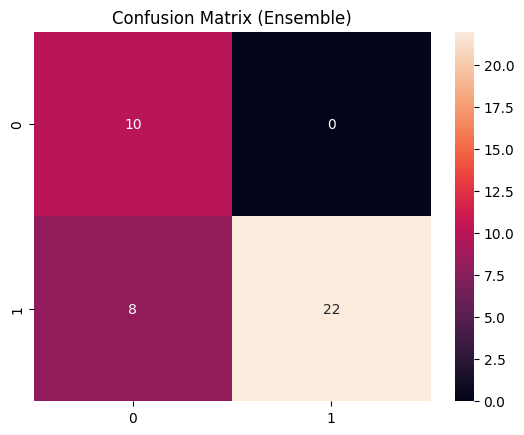

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.73      0.85        30

    accuracy                           0.80        40
   macro avg       0.78      0.87      0.78        40
weighted avg       0.89      0.80      0.81        40



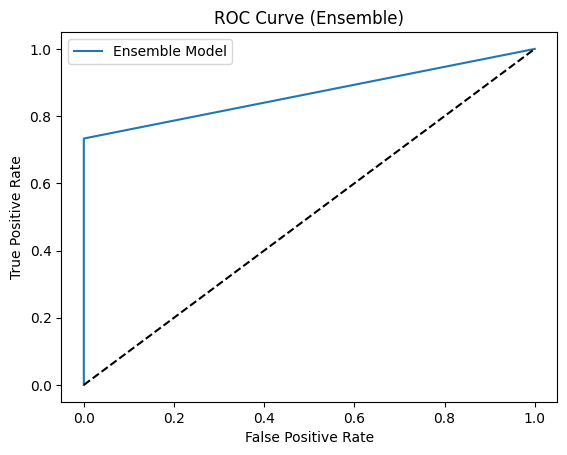

ROC AUC Score (Ensemble): 0.8666666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define a more complex model pipeline with ensemble methods
ensemble_model_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid_ensemble = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Fit the grid search on the resampled data
grid_search_ensemble = GridSearchCV(estimator=ensemble_model_pipeline, param_grid=param_grid_ensemble, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_ensemble.fit(X_train_res, y_train_res)

# Best parameters
print(f'Best Parameters (Ensemble): {grid_search_ensemble.best_params_}')

# Train the best ensemble model
best_ensemble_pipeline = grid_search_ensemble.best_estimator_
best_ensemble_pipeline.fit(X_train_res, y_train_res)

# Predictions with the ensemble model
y_pred_ensemble = best_ensemble_pipeline.predict(X_test_transformed)
y_prob_ensemble = best_ensemble_pipeline.predict_proba(X_test_transformed)[:, 1]

# Accuracy for the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble}')

# Confusion Matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d')
plt.title('Confusion Matrix (Ensemble)')
plt.show()

# Classification Report for the ensemble model
print(classification_report(y_test, y_pred_ensemble))

# ROC Curve for the ensemble model
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_prob_ensemble)
plt.plot(fpr_ensemble, tpr_ensemble, label='Ensemble Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Ensemble)')
plt.legend()
plt.show()

# ROC AUC Score for the ensemble model
roc_auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)
print(f'ROC AUC Score (Ensemble): {roc_auc_ensemble}')


Best Parameters (Ensemble): {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Ensemble Model Accuracy: 0.8


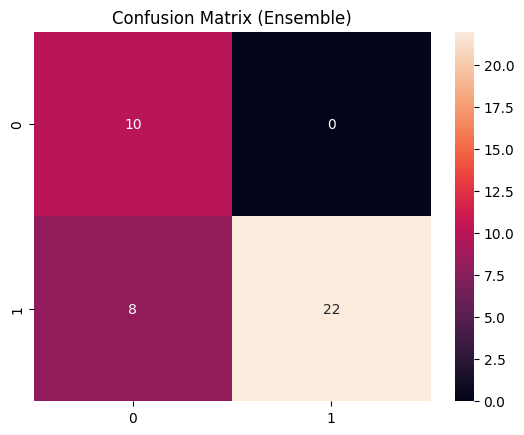

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.73      0.85        30

    accuracy                           0.80        40
   macro avg       0.78      0.87      0.78        40
weighted avg       0.89      0.80      0.81        40



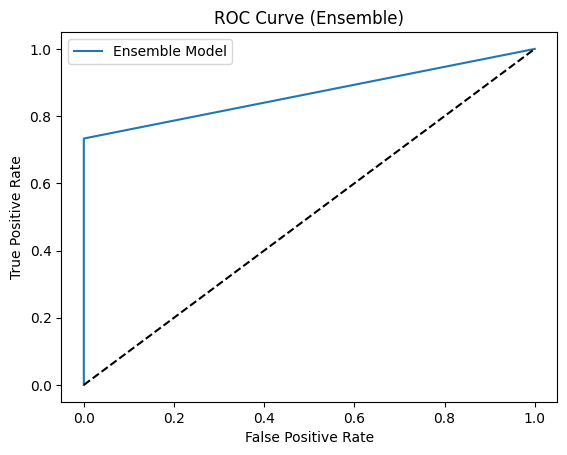

ROC AUC Score (Ensemble): 0.8666666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define a more complex model pipeline with ensemble methods
ensemble_model_pipeline = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameter tuning using GridSearchCV
param_grid_ensemble = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}

# Fit the grid search on the resampled data
grid_search_ensemble = GridSearchCV(estimator=ensemble_model_pipeline, param_grid=param_grid_ensemble, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_ensemble.fit(X_train_res, y_train_res)

# Best parameters
print(f'Best Parameters (Ensemble): {grid_search_ensemble.best_params_}')

# Train the best ensemble model
best_ensemble_pipeline = grid_search_ensemble.best_estimator_
best_ensemble_pipeline.fit(X_train_res, y_train_res)

# Predictions with the ensemble model
y_pred_ensemble = best_ensemble_pipeline.predict(X_test_transformed)
y_prob_ensemble = best_ensemble_pipeline.predict_proba(X_test_transformed)[:, 1]

# Accuracy for the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble}')

# Confusion Matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d')
plt.title('Confusion Matrix (Ensemble)')
plt.show()

# Classification Report for the ensemble model
print(classification_report(y_test, y_pred_ensemble))

# ROC Curve for the ensemble model
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_prob_ensemble)
plt.plot(fpr_ensemble, tpr_ensemble, label='Ensemble Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Ensemble)')
plt.legend()
plt.show()

# ROC AUC Score for the ensemble model
roc_auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)
print(f'ROC AUC Score (Ensemble): {roc_auc_ensemble}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2

# Load dataset
data = pd.read_csv('dataset_for_cancersequences_reduced.csv')

# Preprocessing
label_encoder = LabelEncoder()
data['Sequence'] = label_encoder.fit_transform(data['Sequence'])
data['Cancer name'] = label_encoder.fit_transform(data['Cancer name'])

# Drop 'Gene' column
data = data.drop('Gene Name', axis=1)

X = data.drop('Label', axis=1)
y = data['Label']

# Feature Selection
selector = SelectKBest(chi2, k='all') # Select all features
X = selector.fit_transform(X, y)

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model parameters for grid search
param_grid = {
    "Logistic Regression": {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    "Naive Bayes": {},  # No hyperparameters for GaussianNB
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9],
        'gamma': [0, 0.1, 0.2, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    "Gradient Boosting": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9]
    },
    "AdaBoost": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [50, 100, 150, 200]
    },
    "SGD Classifier": {
        'loss': ['hinge', 'log', 'modified_huber'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'],
        'eta0': [0.01, 0.1, 1]
    }
}

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SGD Classifier": SGDClassifier()
}

# Training and evaluating models
results = {}
for name, model in models.items():
    print(f"Training: {name}")
    # Use GridSearchCV for exhaustive search
    grid_search = GridSearchCV(model, param_grid=param_grid[name], scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "classification_report": report,
        "roc_auc": roc_auc,
        "sensitivity": sensitivity,
        "specificity": specificity
    }

# Display results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC AUC: N/A")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")
    print("\n" + "-"*60 + "\n")

Training: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Training: Random Forest
Training: Support Vector Machine
Training: K-Nearest Neighbors
Training: Decision Tree
Training: Naive Bayes
Training: XGBoost
Training: Gradient Boosting
Training: AdaBoost
Training: SGD Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Model: Logistic Regression
Accuracy: 0.9048
Confusion Matrix:
[[10  0]
 [ 2  9]]
Classification Report:
{'0': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 10}, '1': {'precision': 1.0, 'recall': 0.8181818181818182, 'f1-score': 0.9, 'support': 11}, 'accuracy': 0.9047619047619048, 'macro avg': {'precision': 0.9166666666666667, 'recall': 0.9090909090909092, 'f1-score': 0.9045454545454545, 'support': 21}, 'weighted avg': {'precision': 0.9206349206349207, 'recall': 0.9047619047619048, 'f1-score': 0.9043290043290044, 'support': 21}}
ROC AUC: 0.9091
Sensitivity: 0.8182
Specificity: 1.0000

------------------------------------------------------------

Model: Random Forest
Accuracy: 0.9048
Confusion Matrix:
[[10  0]
 [ 2  9]]
Classification Report:
{'0': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 10}, '1': {'precision': 1.0, 'recall': 0.8181818181818182, 'f1-score': 0.9, 'support': 11}, 'accuracy': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2

# Load dataset
data = pd.read_csv('dataset_for_cancersequences_reduced.csv')

# Preprocessing
label_encoder = LabelEncoder()
data['Sequence'] = label_encoder.fit_transform(data['Sequence'])
data['Cancer name'] = label_encoder.fit_transform(data['Cancer name'])

# Drop 'Gene' column
data = data.drop('Gene Name', axis=1)

X = data.drop('Label', axis=1)
y = data['Label']

# Feature Selection
selector = SelectKBest(chi2, k='all') # Select all features
X = selector.fit_transform(X, y)

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model parameters for randomized search
param_dist = {
    "Logistic Regression": {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100, 1000],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    "Naive Bayes": {},  # No hyperparameters for GaussianNB
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9],
        'gamma': [0, 0.1, 0.2, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    "Gradient Boosting": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 9]
    },
    "AdaBoost": {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [50, 100, 150, 200]
    },
    "SGD Classifier": {
        'loss': ['hinge', 'log', 'modified_huber'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'],
        'eta0': [0.01, 0.1, 1]
    }
}

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SGD Classifier": SGDClassifier()
}

# Training and evaluating models
results = {}
for name, model in models.items():
    print(f"Training: {name}")
    # Use RandomizedSearchCV for a broader search
    rand_search = RandomizedSearchCV(model, param_distributions=param_dist[name], scoring='accuracy', cv=5, n_iter=50, random_state=42)
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "classification_report": report,
        "roc_auc": roc_auc,
        "sensitivity": sensitivity,
        "specificity": specificity
    }

# Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('svm', SVC(probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

accuracy_stack = accuracy_score(y_test, y_pred_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)
report_stack = classification_report(y_test, y_pred_stack, output_dict=True)
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)

sensitivity_stack = cm_stack[1, 1] / (cm_stack[1, 0] + cm_stack[1, 1])
specificity_stack = cm_stack[0, 0] / (cm_stack[0, 0] + cm_stack[0, 1])

results['Stacking Classifier'] = {
    "accuracy": accuracy_stack,
    "confusion_matrix": cm_stack,
    "classification_report": report_stack,
    "roc_auc": roc_auc_stack,
    "sensitivity": sensitivity_stack,
    "specificity": specificity_stack
}

# Display results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}" if metrics['roc_auc'] is not None else "ROC AUC: N/A")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")
    print("\n" + "-"*60 + "\n")

Training: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Training: Random Forest
Training: Support Vector Machine
Training: K-Nearest Neighbors


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training: Decision Tree
Training: Naive Bayes
Training: XGBoost


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training: Gradient Boosting
Training: AdaBoost


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training: SGD Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Model: Logistic Regression
Accuracy: 0.9048
Confusion Matrix:
[[10  0]
 [ 2  9]]
Classification Report:
{'0': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 10}, '1': {'precision': 1.0, 'recall': 0.8181818181818182, 'f1-score': 0.9, 'support': 11}, 'accuracy': 0.9047619047619048, 'macro avg': {'precision': 0.9166666666666667, 'recall': 0.9090909090909092, 'f1-score': 0.9045454545454545, 'support': 21}, 'weighted avg': {'precision': 0.9206349206349207, 'recall': 0.9047619047619048, 'f1-score': 0.9043290043290044, 'support': 21}}
ROC AUC: 0.9091
Sensitivity: 0.8182
Specificity: 1.0000

------------------------------------------------------------

Model: Random Forest
Accuracy: 0.9048
Confusion Matrix:
[[10  0]
 [ 2  9]]
Classification Report:
{'0': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 10}, '1': {'precision': 1.0, 'recall': 0.8181818181818182, 'f1-score': 0.9, 'support': 11}, 'accuracy': 0.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_for_cancersequences_reduced.csv to dataset_for_cancersequences_reduced.csv


In [ ]:
import pandas as pd
from Bio import SeqIO
from io import StringIO

# Function to parse FASTA formatted strings
def parse_fasta_string(fasta_string):
    fasta_io = StringIO(fasta_string)
    for record in SeqIO.parse(fasta_io, "fasta"):
        return str(record.seq)

# Load the CSV file
# Replace 'path/to/your/data.csv' with the actual path to your CSV file
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Check the column names in your DataFrame
print(data.columns)

# Assuming the FASTA sequences are in a column named 'Sequence' (or adjust accordingly)
data['Parsed Sequence'] = data['Sequence'].apply(parse_fasta_string) # Apply the parsing function to the correct column

# Display the first few rows to verify
print(data.head())


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
           ID                                           Sequence Cancer name  \
0  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   
1  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   
2  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   
3  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   
4  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   

  Gene Name  Label Parsed Sequence  
0      Homo      1            None  
1      Homo      1            None  
2      Homo      1            None  
3      Homo      1            None  
4      Homo      1            None  


In [ ]:
import pandas as pd
from Bio import SeqIO
from io import StringIO

# Function to parse FASTA formatted strings (unchanged)
def parse_fasta_string(fasta_string):
    fasta_io = StringIO(fasta_string)
    for record in SeqIO.parse(fasta_io, "fasta"):
        return str(record.seq)

# Upgrade pandas to the latest version
!pip install --upgrade pandas

# Load the CSV file with error handling and explicit delimiter
try:
    # Use 'on_bad_lines' instead of 'error_bad_lines' for older pandas versions
    data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv', delimiter=',', on_bad_lines='skip', engine='python')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Handle the parsing error, e.g., skip problematic lines or investigate further

# Check the shape of the DataFrame
print(data.shape)

# Check the column names
print(data.columns)

# Assuming the FASTA sequences are in the 'Sequence' column (adjust if necessary)
data['Parsed Sequence'] = data['Sequence'].apply(parse_fasta_string)

# Display the first few rows to verify
print(data.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
(60, 5)
Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
           ID                                           Sequence Cancer name  \
0  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   
1  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidney   
2  1519316314  ACACTTACTTGCACCAGTGCCCAGAGAGGGGGTGCAGGCTGAGGAG...      kidn

logistic regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Import OneHotEncoder

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Import OneHotEncoder

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Initialize Logistic Regression model
lr = LogisticRegression()

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist_lr, scoring='accuracy', cv=5, n_iter=100, random_state=42)
rand_search_lr.fit(X_train, y_train)
best_lr = rand_search_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Confusion Matrix:\n{cm_lr}")
print(f"Classification Report:\n{report_lr}")
print(f"ROC AUC: {roc_auc_lr:.4f}")


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Logistic Regression Accuracy: 1.0000
Confusion Matrix:
[[ 2  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

ROC AUC: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


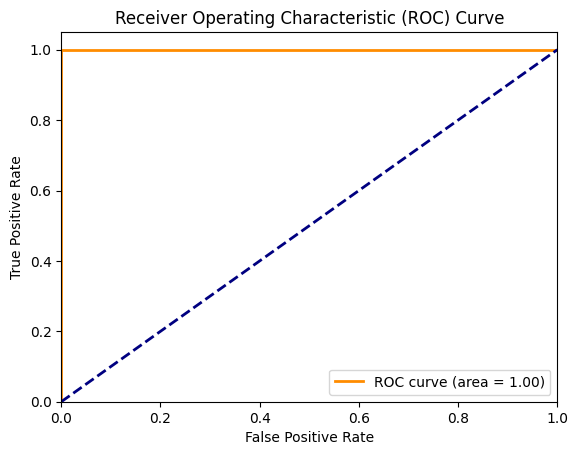

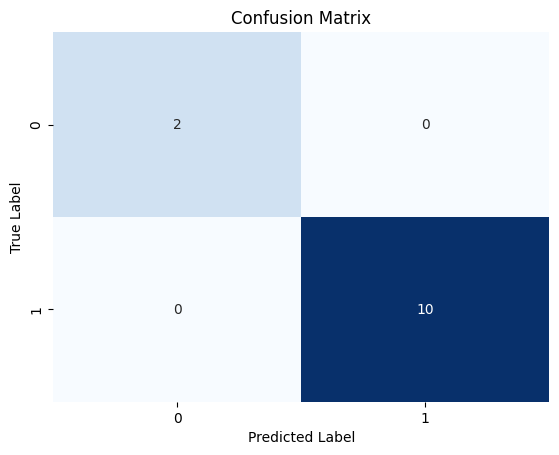

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for Random Forest
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier()

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, scoring='accuracy', cv=5, n_iter=100, random_state=42, n_jobs=-1)
rand_search_rf.fit(X_train, y_train)
best_rf = rand_search_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Classification Report:\n{report_rf}")
print(f"ROC AUC: {roc_auc_rf:.4f}")


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Accuracy: 1.0000
Confusion Matrix:
[[ 2  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

ROC AUC: 1.0000


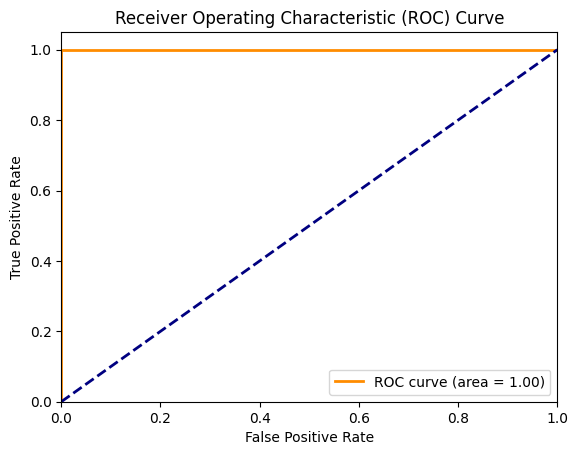

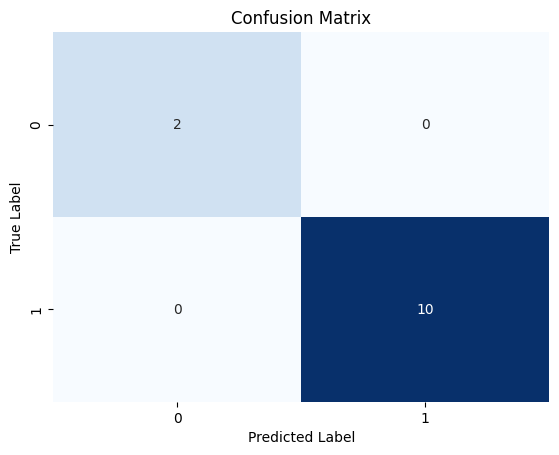

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for SVM
param_dist_svm = {
    'C': np.logspace(-4, 4, 20),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 20)),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]  # Only used if kernel is 'poly'
}

# Initialize SVM model
svm = SVC(probability=True)

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, scoring='accuracy', cv=5, n_iter=100, random_state=42, n_jobs=-1)
rand_search_svm.fit(X_train, y_train)
best_svm = rand_search_svm.best_estimator_

# Predictions
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Confusion Matrix:\n{cm_svm}")
print(f"Classification Report:\n{report_svm}")
print(f"ROC AUC: {roc_auc_svm:.4f}")

# Plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-8437a0f11721>", line 55, in <cell line: 55>
    rand_search_svm.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1768, in _run_search
    evaluate_candidates(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 2007, in __call__
    return output if self.return_gene

TypeError: object of type 'NoneType' has no len()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for SVM
param_dist_svm = {
    'C': np.logspace(-4, 4, 20),
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 20)),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]  # Only used if kernel is 'poly'
}

# Initialize SVM model
svm = SVC(probability=True)

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, scoring='accuracy', cv=5, n_iter=100, random_state=42, n_jobs=-1)
rand_search_svm.fit(X_train, y_train)
best_svm = rand_search_svm.best_estimator_

# Predictions
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Confusion Matrix:\n{cm_svm}")
print(f"Classification Report:\n{report_svm}")
print(f"ROC AUC: {roc_auc_svm:.4f}")

# Plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
# OneHotEncoder is generally preferred for categorical features with no ordinal relationship
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]  # Only used if kernel is 'poly'
}

# Initialize SVC model
svc = SVC(probability=True)

# Use GridSearchCV for hyperparameter tuning
grid_search_svc = GridSearchCV(svc, param_grid=param_grid_svc, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_

# Predictions
y_pred_svc = best_svc.predict(X_test)
y_proba_svc = best_svc.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_proba_svc)

print(f"SVC Accuracy: {accuracy_svc:.4f}")
print(f"Confusion Matrix:\n{cm_svc}")
print(f"Classification Report:\n{report_svc}")
print(f"ROC AUC: {roc_auc_svc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_svc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
